In [3]:
import numpy as np
import pandas as pd
%run utils.ipynb

In [7]:
df = load_sim_data('DataFiles/Mg22_alphaalpha_digiSim.h5')

In [8]:
# Preprocessing Raw data in order to get higher level features
avg_x_reac = []
avg_y_reac = []
avg_z_reac = []
sum_charge_reac = []

avg_x_beam = []
avg_y_beam = []
avg_z_beam = []
sum_charge_beam = []

for e in df:
    
    if(e.label == 0):
        
        avg_x_reac.append(np.mean(e.x))
        avg_y_reac.append(np.mean(e.y))
        avg_z_reac.append(np.mean(e.z))
        sum_charge_reac.append(np.sum(e.q))

    if(e.label == 1):
        
        avg_x_beam.append(np.mean(e.x))
        avg_y_beam.append(np.mean(e.y))
        avg_z_beam.append(np.mean(e.z))
        sum_charge_beam.append(np.sum(e.q))
        
avgx_preprocessed = avg_x_reac + avg_x_beam
avgy_preprocessed = avg_y_reac + avg_y_beam
avgz_preprocessed = avg_z_reac + avg_z_beam
total_sum_charge_preprocessed = sum_charge_reac + sum_charge_beam

preproc_label=np.zeros(len(avg_x_reac)).tolist() + np.ones(len(avg_x_beam)).tolist()

# Min.Max scaling
avgx_preprocessed = (avgx_preprocessed - np.min(avgx_preprocessed)) / (np.max(avgx_preprocessed) - np.min(avgx_preprocessed))
avgy_preprocessed = (avgy_preprocessed - np.min(avgy_preprocessed)) / (np.max(avgy_preprocessed) - np.min(avgy_preprocessed))
avgz_preprocessed = (avgz_preprocessed - np.min(avgz_preprocessed)) / (np.max(avgz_preprocessed) - np.min(avgz_preprocessed))
total_sum_charge_preprocessed = (total_sum_charge_preprocessed - np.min(total_sum_charge_preprocessed))  / (np.max(total_sum_charge_preprocessed) - np.min(total_sum_charge_preprocessed))

preprocessed_dataset = pd.DataFrame({'avgx'   : avgx_preprocessed, 
                                     'avgy'   : avgy_preprocessed,
                                     'avgz'   : avgz_preprocessed,
                                     'totalSum' : total_sum_charge_preprocessed,
                                     'label'  : preproc_label
                                    })

from sklearn.utils import shuffle
preprocessed_dataset = shuffle(preprocessed_dataset)
train_set        = preprocessed_dataset[:int(0.8*1995)].drop('label', 1)
train_label      = preprocessed_dataset[:int(0.8*1995)]['label']
validation_set   = preprocessed_dataset[int(0.8*1995):].drop('label', 1)
validation_label = preprocessed_dataset[int(0.8*1995):]['label']

## Autoencoder

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\fraca\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\fraca\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\fraca\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\fraca\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoder1 (Dense)             (None, 2)                 10        
_________________________________________________________________
Decoder1 (Dense)             (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
Train on 1596 samples, validate on 399 samples
Epoch 1/400
1596/1596 [==============================] - 0s 128us/sample - loss: 0.4012 - mean_squared_error: 0.4012 - val_loss: 0.3603 - val_mean_squared_error: 0.3603
Epoch 2/400
1596/1596 [==============================] - 0s 36us/sample - loss: 0.3405 - mean_squared_error: 0.3405 - val_loss: 0.3045 - val_mean_squared_error: 0.3045
Epoch 3/400
1596/1596 [==============================] - 0s 29us/sample - loss: 0.2907 - mean_squared_error: 0.2907 - val_loss: 0.2609 - v

1596/1596 [==============================] - 0s 27us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 46/400
1596/1596 [==============================] - 0s 21us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 47/400
1596/1596 [==============================] - 0s 22us/sample - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 48/400
1596/1596 [==============================] - 0s 22us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 49/400
1596/1596 [==============================] - 0s 26us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 50/400
1596/1596 [==============================] - 0s 26us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0305 - val_mean_squared_error: 0.0305

1596/1596 [==============================] - 0s 24us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 94/400
1596/1596 [==============================] - 0s 23us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 95/400
1596/1596 [==============================] - 0s 24us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 96/400
1596/1596 [==============================] - 0s 24us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 97/400
1596/1596 [==============================] - 0s 22us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 98/400
1596/1596 [==============================] - 0s 24us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0254 - val_mean_squared_error: 0.0254

1596/1596 [==============================] - 0s 26us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 142/400
1596/1596 [==============================] - 0s 28us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 143/400
1596/1596 [==============================] - 0s 26us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 144/400
1596/1596 [==============================] - 0s 22us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 145/400
1596/1596 [==============================] - 0s 26us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 146/400
1596/1596 [==============================] - 0s 25us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0178 - val_mean_squared_error: 0

Epoch 189/400
1596/1596 [==============================] - 0s 36us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 190/400
1596/1596 [==============================] - 0s 35us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 191/400
1596/1596 [==============================] - 0s 33us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 192/400
1596/1596 [==============================] - 0s 30us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 193/400
1596/1596 [==============================] - 0s 31us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 194/400
1596/1596 [==============================] - 0s 22us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0112 - val_mean_sq

1596/1596 [==============================] - 0s 26us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 238/400
1596/1596 [==============================] - 0s 29us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 239/400
1596/1596 [==============================] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.01 - 0s 24us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 240/400
1596/1596 [==============================] - 0s 24us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 241/400
1596/1596 [==============================] - 0s 30us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 242/400
1596/1596 [==============================] - 0s 30us/sample - loss: 0.0116 - mean_squared_error: 0

Epoch 285/400
1596/1596 [==============================] - 0s 27us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 286/400
1596/1596 [==============================] - 0s 23us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 287/400
1596/1596 [==============================] - 0s 21us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 288/400
1596/1596 [==============================] - 0s 22us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 289/400
1596/1596 [==============================] - 0s 20us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 290/400
1596/1596 [==============================] - 0s 20us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0109 - val_mean_sq

Epoch 333/400
1596/1596 [==============================] - 0s 21us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 334/400
1596/1596 [==============================] - 0s 22us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 335/400
1596/1596 [==============================] - 0s 21us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 336/400
1596/1596 [==============================] - 0s 25us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 337/400
1596/1596 [==============================] - 0s 28us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 338/400
1596/1596 [==============================] - 0s 23us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0108 - val_mean_sq

1596/1596 [==============================] - 0s 27us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 382/400
1596/1596 [==============================] - 0s 27us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 383/400
1596/1596 [==============================] - 0s 25us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 384/400
1596/1596 [==============================] - 0s 34us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 385/400
1596/1596 [==============================] - 0s 25us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 386/400
1596/1596 [==============================] - 0s 25us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0108 - val_mean_squared_error: 0

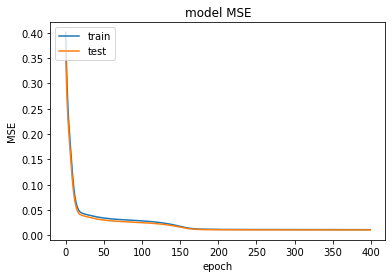

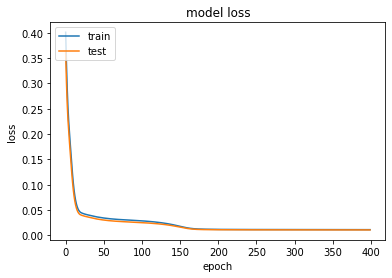

In [10]:
# Building autoencoder model
autoencoder = keras.Sequential()
autoencoder.add(keras.Input(shape=(4,)))

# Encoder Part
autoencoder.add(layers.Dense(2,activation='tanh', name='Encoder1'))
# Decoder Part
autoencoder.add(layers.Dense(4,activation='tanh', name='Decoder1'))

autoencoder.summary()

# Compiling Model
autoencoder.compile(
        optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.99, beta_2=0.999),
        loss      = keras.losses.MeanSquaredError(),
        metrics   = [keras.metrics.MeanSquaredError()]
    )

# Training The Model

history = autoencoder.fit(
                            train_set,
                            train_set,
                            validation_data = (validation_set,validation_set),
                            batch_size=64,
                            epochs=400
                         )

# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
# Defining Encoder
encoder       = autoencoder.get_layer("Encoder1").output
encoder_model = keras.Model(inputs=autoencoder.input, outputs=encoder)

# Training Clustering k-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=10).fit(encoder_model.predict(train_set))


IndexError: index 2 is out of bounds for axis 0 with size 2

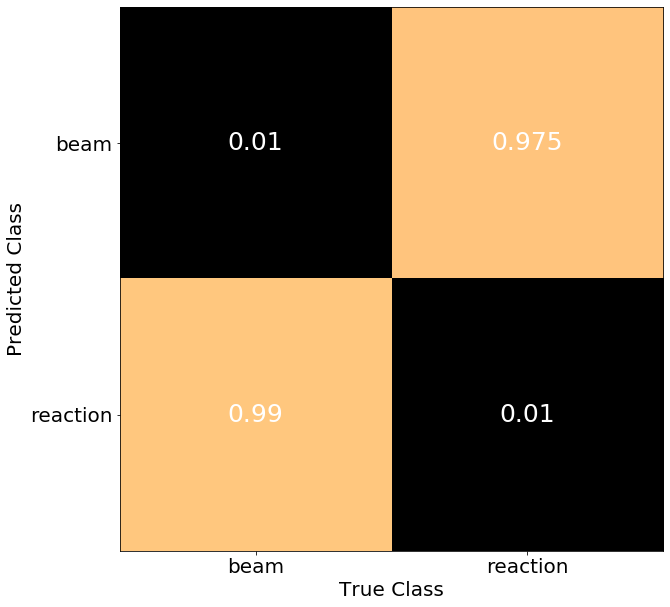

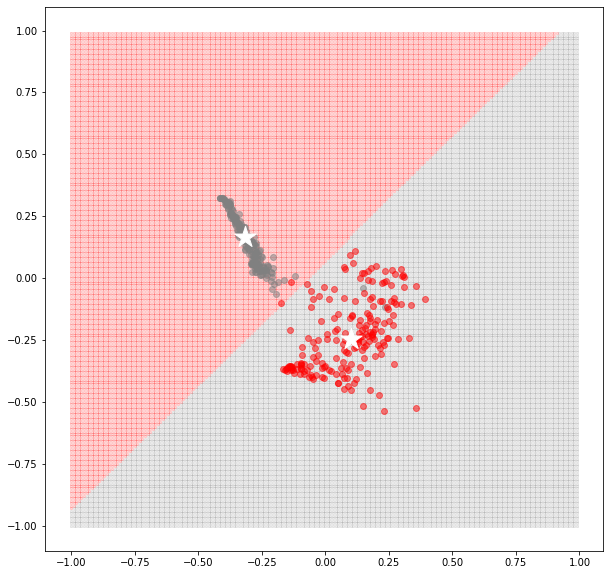

In [14]:
x_latent = encoder_model.predict(validation_set)[:, 0]
y_latent = encoder_model.predict(validation_set)[:, 1]

list_reac_x = []
list_reac_y = []
list_beam_x = []
list_beam_y = []

for xl,yl,l in zip(x_latent, y_latent, validation_label) :
    
        if(l==0):
            
            list_reac_x.append(xl)
            list_reac_y.append(yl)
    
        else:
            
            list_beam_x.append(xl)
            list_beam_y.append(yl)
            
centroids = kmeans.cluster_centers_

# Draw Background class regions
points = np.random.uniform(-1,1,(10,2))

p_reac_x = []
p_reac_y = []
p_beam_x = []
p_beam_y = []

for x in np.arange(-1, 1, 0.01):
    
    for y in np.arange(-1, 1, 0.01):
    
        p = np.array([x,y], dtype=np.float32).reshape(1,-1)

        if(kmeans.predict(p) == 0):

            p_reac_x.append(p[0][0])
            p_reac_y.append(p[0][1])
            
        else:            
            
            p_beam_x.append(p[0][0])
            p_beam_y.append(p[0][1])


# Scoring Clustering Results
l00 = 0
l01 = 0
l10 = 0
l11 = 0

for xl, yl,l in zip(x_latent, y_latent, validation_label):
    
    predicted_label = kmeans.predict(np.array([xl,yl], dtype=np.float32).reshape(1,-1))
    
    if(predicted_label == 0 and l == 0):
        l00 += 1
    if(predicted_label == 0 and l == 1):
        l01 += 1
    if(predicted_label == 1 and l == 0):
        l10 += 1
    if(predicted_label == 1 and l == 1):
        l11 += 1
    
# Compute the Confusion Matrix
cm = np.matrix([[l00/(l00+l10),l01/(l11+l10)],[l10/(l10+l00),l11/(l01+l11)]])
    
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, cmap='copper')

ax.set_xticks(np.arange(len(['beam', 'reaction'])))
ax.set_yticks(np.arange(len(['beam', 'reaction'])))

ax.set_xticklabels(['beam', 'reaction'])
ax.set_yticklabels(['beam', 'reaction'])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel("Predicted Class", fontsize=20)
plt.xlabel("True Class", fontsize=20)

for i in range(len(['beam','reaction'])):
    for j in range(len(['beam', 'reaction'])):
        text = ax.text(j, i, np.round(cm[i, j],3),
                       ha="center", va="center", color="w", fontsize=25)

# Visualizing Results
fig = plt.figure(figsize=(10,10))
plt.scatter(p_reac_x, p_reac_y, color='gray', marker='s', s=5, alpha=0.15)
plt.scatter(p_beam_x, p_beam_y, color='red', marker='s', s=5, alpha=0.15)
plt.scatter(list_reac_x, list_reac_y, color='gray', label='Reaction', alpha=0.5)
plt.scatter(list_beam_x, list_beam_y, color='red', label='Beam', alpha=0.5)
plt.scatter([centroids[0][0]],[centroids[0][1]], marker='*', s=500, c='white')
plt.scatter([centroids[1][0]],[centroids[1][1]], marker='*', s=500, c='white')
plt.scatter([centroids[2][0]],[centroids[2][1]], marker='*', s=500, c='white')

plt.legend(fontsize=20);
plt.title("Validation Set Clustering in Latent Space", fontsize=20);
plt.xticks(fontsize=20);
plt.xlabel("Latent Space X", fontsize=20);
plt.yticks(fontsize=20);
plt.ylabel("Latent Space Y", fontsize=20);